In [1]:
#loading the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../Final_Data_Set/Original Dataset without Outliers.csv')

In [3]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create copies of df
df_copy = df.copy()

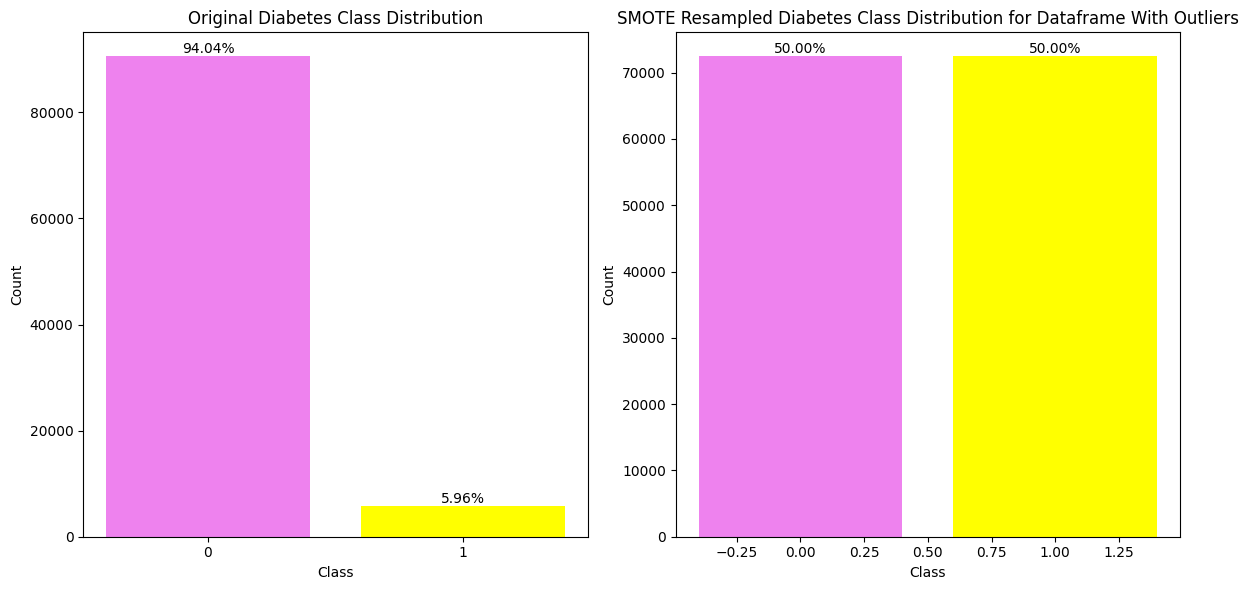

In [6]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class in the original dataset
original_class_counts = df["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(df) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_train).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_train) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe With Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [7]:
# Create a DataFrame from the SMOTE resampled data
new_df_smote= pd.DataFrame(data=X_train, columns=X_train.columns)
new_df_smote["diabetes"] = y_train

new_df_smote

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,6.000000,0,0,25.590000,4.500000,90,-0.247356,0.160772,0
1,2.000000,0,0,18.840000,5.000000,158,-0.247356,-0.128959,0
2,21.000000,0,0,22.710000,6.600000,159,-0.247356,-0.128959,0
3,5.000000,0,0,27.320000,3.500000,145,-0.247356,-0.128959,0
4,7.000000,0,0,27.320000,6.200000,160,-0.247356,-0.128959,0
...,...,...,...,...,...,...,...,...,...
144895,58.000000,0,0,43.880784,6.880685,126,-0.247356,-0.128959,1
144896,51.755109,0,0,27.260620,5.773467,130,-0.247356,-0.058006,1
144897,36.367183,0,0,30.146539,7.227864,155,0.133803,-0.128959,1
144898,50.000000,0,0,24.527941,6.960666,160,0.452953,-0.012852,1


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(new_df_smote.drop('diabetes', axis=1), new_df_smote['diabetes'], test_size=0.2, random_state=42)

In [10]:
# Creating the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# Training the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [13]:
#calculating accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#calculating precision score 
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

#calculating recall score 
y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

#calculating F1 score 
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1: {f1}")

#calculating ROC AUC Score
y_pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.979296066252588
Precision: 0.9868549853167389
Recall: 0.9716370645738676
F1: 0.9791869016234217
ROC AUC: 0.9793151422218997
